### PACKAGES

In [ ]:
pip install nsetools

In [ ]:
pip install yfinance

In [ ]:
pip install yfinance pandas mplfinance TA-Lib

In [115]:
pip install tensorflow==2.12.0


  Obtaining dependency information for tensorflow==2.12.0 from https://files.pythonhosted.org/packages/29/32/634f7277aee86101e74d50230e72795c33a5d3279320b78ac67e8f37454b/tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Obtaining dependency information for tensorflow-intel==2.12.0 from https://files.pythonhosted.org/packages/2c/14/5ae30837269512867efbfa7144b45e816db43b98e3f663f5a51a8148d5c3/tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Obtaining dependency information for jax>=0.3.15 from https://files.pythonhosted.org/packages/35/c1/51a51ea646864ef8b4bd68632162ed1b4495c580b9bfa72fe49168221d69/jax-0.4.24-py3-none-any.whl.metadata
  Using cached jax-0.4.24-py3-none-any.whl.metadata (24 kB)
  Obtaining dependency information for numpy<1.24,>=1.22 from https:/

  ERROR: Failed to restore c:\users\royston\anaconda3\lib\site-packages\numpy-1.24.3.dist-info\
  ERROR: Failed to restore c:\users\royston\anaconda3\lib\site-packages\numpy\
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Royston\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\Royston\anaconda3\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Royston\anaconda3\Lib\site-packages\pip\_internal\commands\install.py", line 452, in run
    installed = install_given_reqs(
                ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Royston\anaconda3\Lib\site-packages\pip\_internal\req\__init__.py", line 72, in install_given_reqs
    requirement.install(
  File "C:\Users\Royston\anaconda3\Lib\site-packages\pip\_internal\req\req_install.py", li

  Obtaining dependency information for tensorflow==2.12.0 from https://files.pythonhosted.org/packages/29/32/634f7277aee86101e74d50230e72795c33a5d3279320b78ac67e8f37454b/tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.12.0 from https://files.pythonhosted.org/packages/2c/14/5ae30837269512867efbfa7144b45e816db43b98e3f663f5a51a8148d5c3/tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for jax>=0.3.15 from https://files.pythonhosted.org/packages/35/c1/51a51ea646864ef8b4bd68632162ed1b4495c580b9bfa72fe49168221d69/jax-0.4.24-py3-none-any.whl.metadata
  Obtaining dependency information for numpy<1.24,>=1.22 from https://files.pythonhosted.org/packages/19/0d/b8c34e4baf258d77a8592bdce45183e9a12874c167f5966c7dd467b74ea9/numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorboard<2.13,>=2.12 from https://files.pythonhosted.org/packages/32/09/86e2ef3b4f4

  ERROR: Failed to restore c:\users\royston\anaconda3\scripts\f2py-script.py
  ERROR: Failed to restore c:\users\royston\anaconda3\scripts\f2py.exe
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Royston\\anaconda3\\Lib\\site-packages\\numpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [118]:
pip install keras

In [30]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from fuzzywuzzy import process

C:\Users\Royston\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Getting the Data

In [2]:
#IMPORTING ALL EQUITY SYMBOLS
tickers_all=pd.read_csv("D:\DSML PG\CAPSTONE PROJECT\EQUITY_L.csv")
tickers_all.head()

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,BE,03-MAY-1995,10,1,INE253B01015,10
2,360ONE,360 ONE WAM LIMITED,EQ,19-SEP-2019,1,1,INE466L01038,1
3,3IINFOLTD,3i Infotech Limited,EQ,22-OCT-2021,10,1,INE748C01038,10
4,3MINDIA,3M India Limited,EQ,13-AUG-2004,10,1,INE470A01017,10


In [5]:
# Function to preprocess company names and perform fuzzy matching
def get_symbol(company_name, tickers_all):
    # Preprocess company names to lowercase
    tickers_all['LOWER_COMPANY_NAME'] = tickers_all['NAME OF COMPANY'].str.lower()
    
    # Perform fuzzy matching to get nearby suggestions
    matches = process.extract(company_name.lower(), tickers_all['LOWER_COMPANY_NAME'], limit=5)
    
    # Print nearby suggestions
    print("Nearby Suggestions:")
    for i, match in enumerate(matches, start=1):
        print(f"{i}. {match[0]}")

    # Ask the user to select one of the suggestions
    selection = int(input("Enter the number corresponding to your selection (or 0 to enter manually): "))
    if selection == 0:
        selected_company_name = input("Enter the company name manually: ")
        company_data = tickers_all[tickers_all["LOWER_COMPANY_NAME"] == selected_company_name.lower()]
    elif 1 <= selection <= len(matches):
        selected_company_name = matches[selection - 1][0]
        company_data = tickers_all[tickers_all["LOWER_COMPANY_NAME"] == selected_company_name.lower()]
    else:
        print("Invalid selection.")
        return None

    # Extract the symbol for the selected company
    if not company_data.empty:
        symbol = company_data.iloc[0]["SYMBOL"]
        symbol_with_extension = symbol + ".NS"  # Add .NS to the symbol
        print(f"Symbol for {selected_company_name}: {symbol_with_extension}")
        return {"ticker": symbol_with_extension, "company_name": selected_company_name}
    else:
        print(f"No data found for {selected_company_name}")
        return None

# INPUT REQUIRED COMPANY NAME
company_name = input('Enter the company name: ')
result = get_symbol(company_name, tickers_all)
if result:
    ticker = result["ticker"]
    selected_company_name = result["company_name"]
    print("Symbol saved in ticker:", ticker)
    print("Company name saved:", selected_company_name)
else:
    print("No symbol found.")

Enter the company name: YES
Nearby Suggestions:
1. yes bank limited
2. aaa technologies limited
3. aaron industries limited
4. aarti industries limited
5. aavas financiers limited
Enter the number corresponding to your selection (or 0 to enter manually): 1
Symbol for yes bank limited: YESBANK.NS
Symbol saved in ticker: YESBANK.NS
Company name saved: yes bank limited


In [6]:
ticker

'YESBANK.NS'

In [7]:
selected_company_name

'yes bank limited'

In [8]:
current_date = datetime.now().strftime('%Y-%m-%d')

In [9]:
price_data=yf.download(ticker,start='2013-01-01', end=current_date)

[*********************100%%**********************]  1 of 1 completed


In [10]:
price_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,93.349998,95.699997,93.209999,95.400002,88.426575,5381020
2013-01-02,95.790001,97.919998,95.769997,97.570000,90.437943,9784680
2013-01-03,97.400002,99.389999,97.400002,98.440002,91.244347,11175970
2013-01-04,98.400002,98.809998,97.599998,97.809998,90.660408,6492540
2013-01-07,97.809998,100.279999,97.809998,99.650002,92.365906,12424670
...,...,...,...,...,...,...
2024-02-22,25.799999,27.350000,24.950001,27.150000,27.150000,667905535
2024-02-23,26.850000,27.400000,26.100000,26.200001,26.200001,353166971
2024-02-26,26.000000,26.000000,25.100000,25.250000,25.250000,271088654


In [11]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2754 entries, 2013-01-01 to 2024-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2754 non-null   float64
 1   High       2754 non-null   float64
 2   Low        2754 non-null   float64
 3   Close      2754 non-null   float64
 4   Adj Close  2754 non-null   float64
 5   Volume     2754 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 150.6 KB


In [12]:
price_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
# Drop null values
price_data.dropna(inplace=True)

In [14]:
price_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2754.000000,2754.000000,2754.000000,2754.000000,2754.000000,2.754000e+03
mean,123.032066,124.987331,120.754680,122.763301,119.325344,8.063862e+07
std,111.724631,113.092823,110.109061,111.552773,109.044824,1.171105e+08
min,10.800000,11.000000,5.650000,10.800000,10.800000,0.000000e+00
25%,17.112500,17.450001,16.900000,17.062500,17.062500,1.287366e+07
50%,93.869999,95.649998,91.660000,93.720001,88.479416,3.404166e+07
75%,189.750004,193.409996,184.799999,189.207504,184.185940,9.873836e+07
max,396.799988,404.000000,392.549988,394.000000,388.668457,1.057367e+09


### Data Visualization

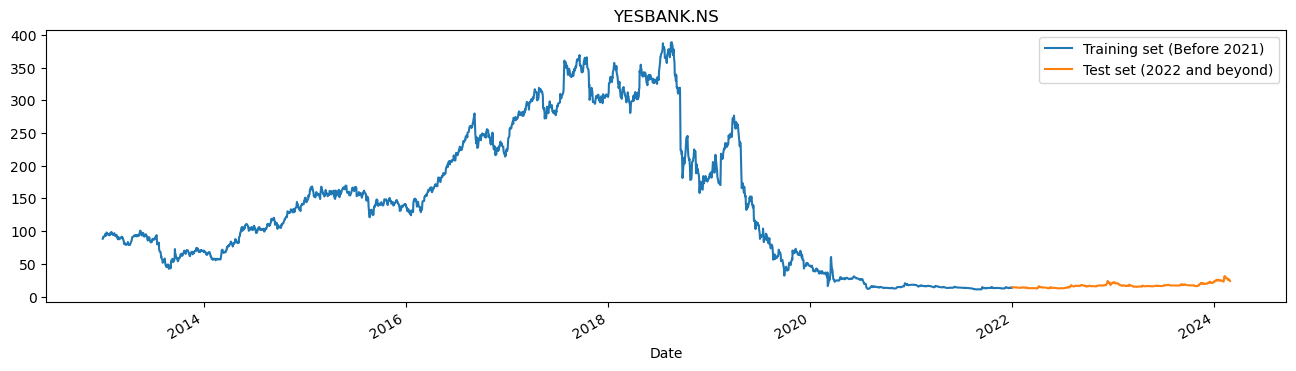

In [15]:
import matplotlib.pyplot as plt
# Plot the training set
price_data["Adj Close"][:'2021'].plot(figsize=(16, 4), legend=True)
# Plot the test set
price_data["Adj Close"]['2022':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2021)', 'Test set (2022 and beyond)'])
plt.title(ticker)
plt.show()

### Data Preprocessing

### MODEL BUILDING

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load your historical stock price data into a DataFrame
# Assuming you have a DataFrame named "stock_data" with columns: Date, Open, High, Low, Close, Adj Close, Volume

# Preprocess the data
def preprocess_data(price_data):
    # Drop irrelevant columns and keep only 'Adj Close'
    price_data = price_data[['Adj Close']]

    # Convert the DataFrame to a numpy array
    data = price_data.values

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    return scaled_data, scaler

# Create sequences and their corresponding target values
def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y)

# Split data into train and test sets
def split_data(X, Y, test_size=0.2):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    return X_train, X_test, Y_train, Y_test

# Define LSTM model
def create_model(seq_length, input_dim):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(seq_length, input_dim)),
        LSTM(units=50),
        Dense(units=1)
    ])
    return model

#preprocess data
scaled_data, scaler = preprocess_data(price_data)

# Define sequence length
seq_length = 30  # You can adjust this value based on your requirements

# Create sequences and their corresponding target values
X, Y = create_sequences(scaled_data, seq_length)

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = split_data(X, Y)

# Define input dimensions
input_dim = X_train.shape[2]

# Create and compile model
model = create_model(seq_length, input_dim)
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate model
loss = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)




Epoch 1/50

69/69 [==============================] - 10s 51ms/step - loss: 0.0076 - val_loss: 8.4838e-04
Epoch 2/50
69/69 [==============================] - 2s 28ms/step - loss: 0.0010 - val_loss: 9.4879e-04
Epoch 3/50
69/69 [==============================] - 2s 28ms/step - loss: 8.7190e-04 - val_loss: 6.1652e-04
Epoch 4/50
69/69 [==============================] - 2s 29ms/step - loss: 7.9389e-04 - val_loss: 0.0013
Epoch 5/50
69/69 [==============================] - 2s 29ms/step - loss: 8.4558e-04 - val_loss: 4.9784e-04
Epoch 6/50
69/69 [==============================] - 2s 29ms/step - loss: 7.2463e-04 - val_loss: 4.7741e-04
Epoch 7/50
69/69 [==============================] - 2s 29ms/step - loss: 6.3283e-04 - val_loss: 4.6309e-04
Epoch 8/50
69/69 [==============================] - 2s 28ms/step - loss: 5.7738e-04 - val_loss: 4.8847e-04
Epoch 9/50
69/69 [==============================] - 2s 29ms/step - loss: 6.3386e-04 - val_loss: 5.0230e-04
Epoch 10/50
69/69 [==========================

In [17]:
X_test.shape

(545, 30, 1)

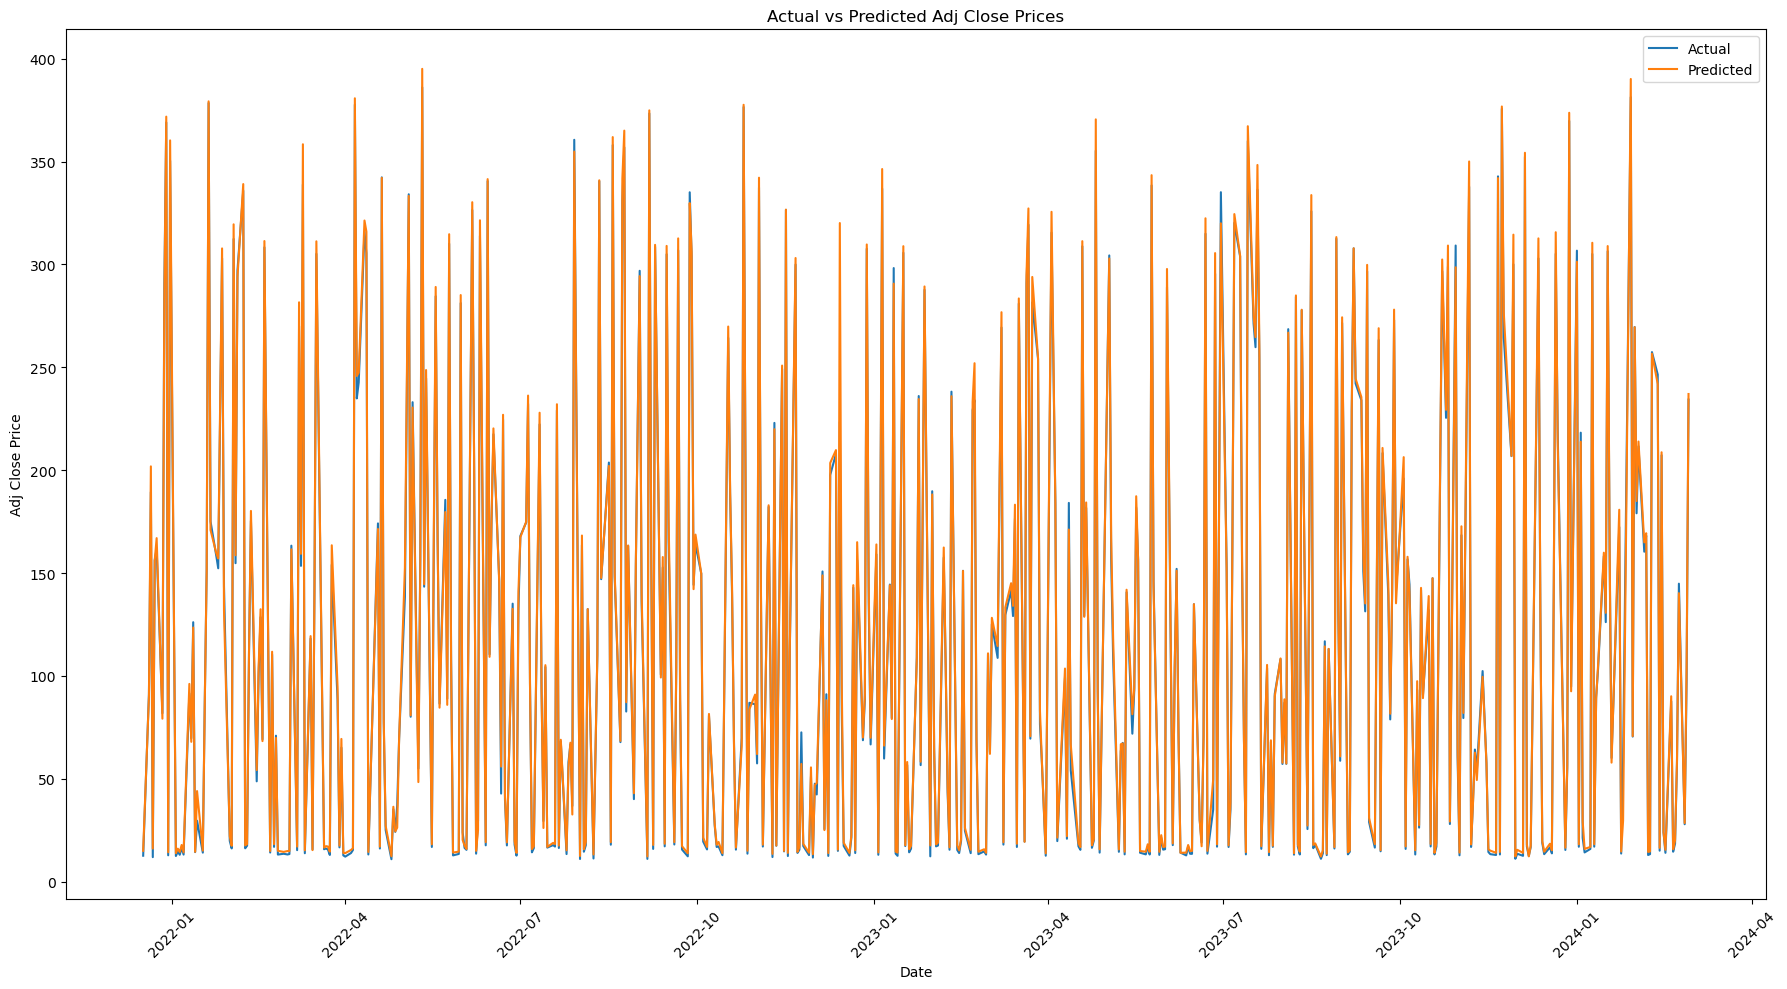

In [18]:
import matplotlib.pyplot as plt

# Plot actual and predicted prices
plt.figure(figsize=(18, 10))
plt.plot(price_data.index[-len(Y_test):], Y_test, label='Actual')
plt.plot(price_data.index[-len(predictions):], predictions, label='Predicted')
plt.title('Actual vs Predicted Adj Close Prices')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### SENTIMENT ANALYSIS

In [19]:
import pandas as pd

# Read the Excel file containing news headlines and dates
excel_file = r'D:\DSML PG\CAPSTONE PROJECT\OTHERS DATA\Econ_Times_Archives Jan_2020ToJan_2024.xlsx'

# Read the Excel file containing listed company names
df_companies = pd.read_excel(excel_file, sheet_name='Listed_Comp_NSE')

# Read the data from 'Sheet3' containing news headlines and dates
df_news = pd.read_excel(excel_file, sheet_name='Sheet3')

In [20]:
df_companies

,Sr. No,Symbol,Company Name,"Market capitalization as on December 31, 2023\n(In Lakhs)"
0,1,RELIANCE,Reliance Industries Limited,174889554.787729
1,2,TCS,Tata Consultancy Services Limited,137248531.907812
2,3,HDFCBANK,HDFC Bank Limited,129740453.999887
3,4,ICICIBANK,ICICI Bank Limited,69902440.891932
4,5,INFY,Infosys Limited,64037070.702681
...,...,...,...,...
2263,2264,VISUINTL,Visu International Limited,"*Not available for trading as on December 31, ..."
2264,2265,VIVIMEDLAB,Vivimed Labs Limited,"*Not available for trading as on December 31, ..."
2265,2266,ZICOM,Zicom Electronic Security Systems Limited,"*Not available for trading as on December 31, ..."
2266,NaN,NaN,NaN,NaN


In [21]:
df_news

,News,Date
0,Reliance Infra's total financial indebtedness ...,03/Jan/2020
1,Reliance Home Finance could land at NCLT,06/Jan/2020
2,"Sensex rises 193 pts on gains in HDFC duo, Rel...",07/Jan/2020
3,"Stocks in the news: Bharti Airtel, YES Bank, I...",10/Jan/2020
4,Bondholders drag Reliance Home Finance to NCLT,10/Jan/2020
...,...,...
223620,Reconsideration after selection of bids possib...,06/Oct/2021
223621,NCLAT disposes of DoT petition against Videoco...,11/Jan/2022
223622,Videocon loan fraud case: CBI cites 'quid pro ...,25/Dec/2022
223623,Loan Fraud Case: CBI arrests Videocon CEO Venu...,26/Dec/2022


In [22]:
selected_company_name

'yes bank limited'

In [85]:
%%time
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_analysis_pipeline = pipeline('sentiment-analysis', model='mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')

# Function to apply sentiment analysis to a list of headlines
def apply_sentiment_analysis(news_headlines):
    # Initialize an empty list to store sentiment scores and labels
    sentiment_scores = []
    sentiment_labels = []
    # Iterate through each news headline
    for headline in news_headlines:
        # Apply sentiment analysis to the headline
        sentiment_analysis_result = sentiment_analysis_pipeline(headline)[0]
        # Extract sentiment score and label
        sentiment_score = sentiment_analysis_result['score']
        sentiment_label = sentiment_analysis_result['label']
        # Append the score and label to the respective lists
        sentiment_scores.append(sentiment_score)
        sentiment_labels.append(sentiment_label)
    return sentiment_scores, sentiment_labels

# Function to fetch news headlines for a selected company
def fetch_company_news(company_name):
    # Split the company name into words
    company_words = company_name.split()
    # Filter news headlines where at least two words from the company name match
    return df_news[df_news['News'].apply(lambda headline: sum(word.lower() in headline.lower() for word in company_words) >= 2)]

# Fetch news headlines for the selected company
relevant_headlines = fetch_company_news(selected_company_name)

# Apply sentiment analysis to the headlines
sentiment_scores, sentiment_labels = apply_sentiment_analysis(relevant_headlines['News'])
relevant_headlines['Sentiment_Score'] = sentiment_scores
relevant_headlines['Sentiment_Label'] = sentiment_labels

# Create a placeholder 'Date' column if not present
if 'Date' not in relevant_headlines.columns:
    relevant_headlines['Date'] = pd.to_datetime('today').date()

# Set the date column as the index
relevant_headlines.set_index('Date', inplace=True)

# Display the relevant headlines with sentiment scores and labels
relevant_headlines


CPU times: total: 25.3 s
Wall time: 46.3 s


<timed exec>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,News,Sentiment_Score,Sentiment_Label
Date,,,
10/Jan/2020,"Stocks in the news: Bharti Airtel, YES Bank, I...",0.898728,neutral
29/Jan/2020,Reliance Power drops 3% as YES Bank sells shar...,0.996980,negative
11/Mar/2020,Sensex ekes out minor gains as Reliance reboun...,0.999665,positive
20/Mar/2020,"Stocks in the news: J&K Bank, Reliance Ind, YE...",0.940642,neutral
25/Mar/2020,"Stocks in the news: Reliance Ind, Quess Corp, ...",0.983918,neutral
...,...,...,...
15/Sep/2020,Australia shares dip as banks drag; eyes on U....,0.997622,negative
01/Apr/2022,Ukraine war a limited threat to European banks...,0.989201,negative
25/May/2022,European shares climb after selloff with eyes ...,0.985901,positive


In [86]:
# Convert the index of the `relevant_headlines` DataFrame to datetime
relevant_headlines.index = pd.to_datetime(relevant_headlines.index)

In [87]:
relevant_headlines

,News,Sentiment_Score,Sentiment_Label
Date,,,
2020-01-10,"Stocks in the news: Bharti Airtel, YES Bank, I...",0.898728,neutral
2020-01-29,Reliance Power drops 3% as YES Bank sells shar...,0.996980,negative
2020-03-11,Sensex ekes out minor gains as Reliance reboun...,0.999665,positive
2020-03-20,"Stocks in the news: J&K Bank, Reliance Ind, YE...",0.940642,neutral
2020-03-25,"Stocks in the news: Reliance Ind, Quess Corp, ...",0.983918,neutral
...,...,...,...
2020-09-15,Australia shares dip as banks drag; eyes on U....,0.997622,negative
2022-04-01,Ukraine war a limited threat to European banks...,0.989201,negative
2022-05-25,European shares climb after selloff with eyes ...,0.985901,positive


In [88]:
price_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,93.349998,95.699997,93.209999,95.400002,88.426575,5381020
2013-01-02,95.790001,97.919998,95.769997,97.570000,90.437943,9784680
2013-01-03,97.400002,99.389999,97.400002,98.440002,91.244347,11175970
2013-01-04,98.400002,98.809998,97.599998,97.809998,90.660408,6492540
2013-01-07,97.809998,100.279999,97.809998,99.650002,92.365906,12424670
...,...,...,...,...,...,...
2024-02-22,25.799999,27.350000,24.950001,27.150000,27.150000,667905535
2024-02-23,26.850000,27.400000,26.100000,26.200001,26.200001,353166971
2024-02-26,26.000000,26.000000,25.100000,25.250000,25.250000,271088654


In [90]:
#COMPARING WITH CHANGE IN STOCK PRICE FOR SAME DAY
# Merge the sentiment scores with the price data based on the date index
merged_data = price_data.merge(relevant_headlines[['Sentiment_Score','Sentiment_Label']], how='left', left_index=True, right_index=True)

# Calculate the stock price change
merged_data['Stock_Price_Change'] = (merged_data['Adj Close'] - merged_data['Open'])

# Calculate the price change percentage
merged_data['Price_Change_Percentage'] = ((merged_data['Adj Close'] - merged_data['Open']) / merged_data['Open']) * 100

# Display the merged data with sentiment classification
merged_data


,Open,High,Low,Close,Adj Close,Volume,Sentiment_Score,Sentiment_Label,Stock_Price_Change,Price_Change_Percentage
Date,,,,,,,,,,
2013-01-01,93.349998,95.699997,93.209999,95.400002,88.426575,5381020,NaN,NaN,-4.923424,-5.274155
2013-01-02,95.790001,97.919998,95.769997,97.570000,90.437943,9784680,NaN,NaN,-5.352058,-5.587283
2013-01-03,97.400002,99.389999,97.400002,98.440002,91.244347,11175970,NaN,NaN,-6.155655,-6.319974
2013-01-04,98.400002,98.809998,97.599998,97.809998,90.660408,6492540,NaN,NaN,-7.739594,-7.865440
2013-01-07,97.809998,100.279999,97.809998,99.650002,92.365906,12424670,NaN,NaN,-5.444092,-5.565987
...,...,...,...,...,...,...,...,...,...,...
2024-02-22,25.799999,27.350000,24.950001,27.150000,27.150000,667905535,NaN,NaN,1.350000,5.232560
2024-02-23,26.850000,27.400000,26.100000,26.200001,26.200001,353166971,NaN,NaN,-0.650000,-2.420855
2024-02-26,26.000000,26.000000,25.100000,25.250000,25.250000,271088654,NaN,NaN,-0.750000,-2.884615


In [91]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3116 entries, 2013-01-01 to 2024-02-28
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Open                     3116 non-null   float64
 1   High                     3116 non-null   float64
 2   Low                      3116 non-null   float64
 3   Close                    3116 non-null   float64
 4   Adj Close                3116 non-null   float64
 5   Volume                   3116 non-null   int64  
 6   Sentiment_Score          728 non-null    float64
 7   Sentiment_Label          728 non-null    object 
 8   Stock_Price_Change       3116 non-null   float64
 9   Price_Change_Percentage  3116 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 267.8+ KB


In [92]:
# Drop null values
merged_data.dropna(inplace=True)

In [93]:
merged_data

,Open,High,Low,Close,Adj Close,Volume,Sentiment_Score,Sentiment_Label,Stock_Price_Change,Price_Change_Percentage
Date,,,,,,,,,,
2020-01-01,46.950001,47.500000,46.500000,46.650002,46.650002,102291841,0.942864,neutral,-0.299999,-0.638976
2020-01-01,46.950001,47.500000,46.500000,46.650002,46.650002,102291841,0.895846,negative,-0.299999,-0.638976
2020-01-01,46.950001,47.500000,46.500000,46.650002,46.650002,102291841,0.999884,neutral,-0.299999,-0.638976
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.999874,neutral,0.549999,1.175212
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.999613,positive,0.549999,1.175212
...,...,...,...,...,...,...,...,...,...,...
2023-12-14,21.500000,22.100000,21.299999,21.400000,21.400000,339666217,0.996032,neutral,-0.100000,-0.465118
2024-01-01,21.500000,23.000000,21.400000,22.650000,22.650000,577972312,0.999577,positive,1.150000,5.348835
2024-01-25,24.799999,25.299999,24.700001,24.850000,24.850000,213588805,0.999876,neutral,0.050001,0.201618


### Compare sentiment score with change in stock price

In [103]:
from scipy.stats import f_oneway

# Group the data by Sentiment_Label and extract the price change percentage
sentiment_groups = merged_data.groupby('Sentiment_Label')['Price_Change_Percentage']

# Perform ANOVA test
anova_result = f_oneway(*[group for label, group in sentiment_groups])

# Define significance level (alpha)
alpha = 0.05

# Display the ANOVA result
print("ANOVA F-Statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# Check if the p-value is less than or equal to the significance level
if anova_result.pvalue <= alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant correlation between sentiment scores and stock price change percentage.")
else:
    print("Do not reject the null hypothesis.")
    print("There is not enough evidence to support a statistically significant correlation between sentiment scores and stock price change percentage.")


ANOVA F-Statistic: 8.717319178748003
ANOVA p-value: 0.00018151835775427462
Reject the null hypothesis.
There is a statistically significant correlation between sentiment scores and stock price change percentage.


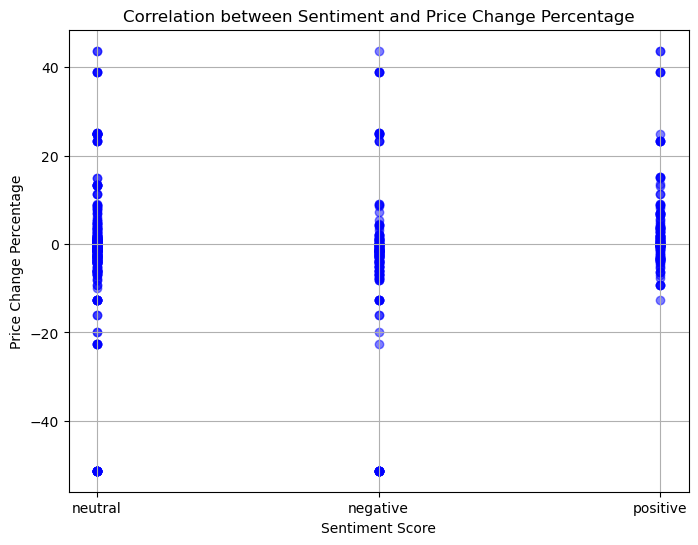

In [107]:
import matplotlib.pyplot as plt

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Sentiment_Label'], merged_data['Price_Change_Percentage'], color='blue', alpha=0.5)
plt.title('Correlation between Sentiment and Price Change Percentage')
plt.xlabel('Sentiment Score')
plt.ylabel('Price Change Percentage')
plt.grid(True)
plt.show()

In [111]:
merged_data

,Open,High,Low,Close,Adj Close,Volume,Sentiment_Score,Sentiment_Label,Stock_Price_Change,Price_Change_Percentage
Date,,,,,,,,,,
2020-01-01,46.950001,47.500000,46.500000,46.650002,46.650002,102291841,0.942864,neutral,-0.299999,-0.638976
2020-01-01,46.950001,47.500000,46.500000,46.650002,46.650002,102291841,0.895846,negative,-0.299999,-0.638976
2020-01-01,46.950001,47.500000,46.500000,46.650002,46.650002,102291841,0.999884,neutral,-0.299999,-0.638976
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.999874,neutral,0.549999,1.175212
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.999613,positive,0.549999,1.175212
...,...,...,...,...,...,...,...,...,...,...
2023-12-14,21.500000,22.100000,21.299999,21.400000,21.400000,339666217,0.996032,neutral,-0.100000,-0.465118
2024-01-01,21.500000,23.000000,21.400000,22.650000,22.650000,577972312,0.999577,positive,1.150000,5.348835
2024-01-25,24.799999,25.299999,24.700001,24.850000,24.850000,213588805,0.999876,neutral,0.050001,0.201618


### CORRELATION WITH GOLD PRICE

In [34]:
# Use the correct ticker symbol for gold, for example, 'GC=F' (Gold Futures)
gold_ticker = 'GC=F'

# Fetch historical data
gold_data = yf.download(gold_ticker, start="2020-01-01", end=current_date)

[*********************100%%**********************]  1 of 1 completed


In [35]:
gold_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214
2020-01-03,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107
2020-01-06,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416
2020-01-07,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47
2020-01-08,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236
...,...,...,...,...,...,...
2024-02-22,2033.199951,2033.199951,2019.699951,2019.699951,2019.699951,964
2024-02-23,2026.000000,2038.599976,2014.900024,2038.599976,2038.599976,22
2024-02-26,2034.099976,2035.400024,2024.800049,2028.500000,2028.500000,143


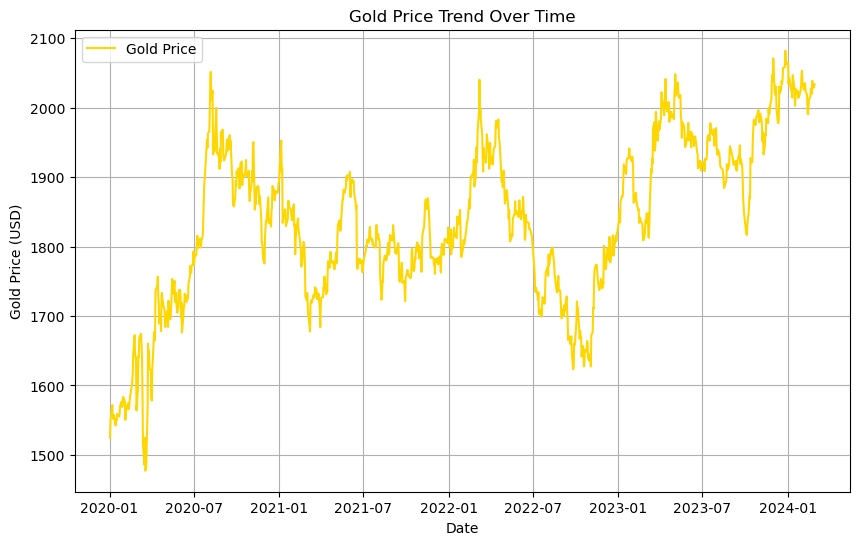

In [36]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(gold_data['Adj Close'], label='Gold Price', color='gold')
plt.title('Gold Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Rename the 'Adj Close' column in gold_data to avoid column name conflicts after merging
gold_data.rename(columns={'Adj Close': 'Gold_Adj_Close'}, inplace=True)

# Merge gold data into the existing DataFrame based on the date index
merged_data = merged_data.merge(gold_data[['Gold_Adj_Close']], how='left', left_index=True, right_index=True)

# Display the merged DataFrame
merged_data

,Open,High,Low,Close,Adj Close,Volume,Sentiment,Sentiment_Class,Stock_Price_Change,Price_Change_Percentage,Gold_Adj_Close
Date,,,,,,,,,,,
2020-01-01,46.950001,47.500000,46.500000,46.650002,46.650002,102291841,0.5319,Positive,-0.299999,-0.638976,NaN
2020-01-01,46.950001,47.500000,46.500000,46.650002,46.650002,102291841,0.8506,Positive,-0.299999,-0.638976,NaN
2020-01-01,46.950001,47.500000,46.500000,46.650002,46.650002,102291841,0.5319,Positive,-0.299999,-0.638976,NaN
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.5319,Positive,0.549999,1.175212,1524.500000
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.6289,Positive,0.549999,1.175212,1524.500000
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-14,21.500000,22.100000,21.299999,21.400000,21.400000,339666217,0.1860,Positive,-0.100000,-0.465118,2030.199951
2024-01-01,21.500000,23.000000,21.400000,22.650000,22.650000,577972312,0.6841,Positive,1.150000,5.348835,NaN
2024-01-25,24.799999,25.299999,24.700001,24.850000,24.850000,213588805,0.4019,Positive,0.050001,0.201618,2016.900024


In [38]:
merged_data.isnull().sum()

Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
Sentiment                   0
Sentiment_Class             0
Stock_Price_Change          0
Price_Change_Percentage     0
Gold_Adj_Close             15
dtype: int64

In [39]:
# Drop null values
merged_data.dropna(inplace=True)

In [40]:
merged_data.isnull().sum()

Open                       0
High                       0
Low                        0
Close                      0
Adj Close                  0
Volume                     0
Sentiment                  0
Sentiment_Class            0
Stock_Price_Change         0
Price_Change_Percentage    0
Gold_Adj_Close             0
dtype: int64

In [41]:
import statsmodels.api as sm


# Fit a linear regression model
X = merged_data[['Gold_Adj_Close']]
y = merged_data['Stock_Price_Change']
X = sm.add_constant(X)  # Add a constant term to the independent variable
model = sm.OLS(y, X).fit()

# Perform hypothesis testing on the coefficient of Gold_Price
p_value = model.pvalues['Gold_Adj_Close']

# Set significance level (alpha)
alpha = 0.05

# Print the results
print("Regression Coefficients:")
print(model.params)
print("\nP-value for Gold_Price Coefficient:", p_value)

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant relationship between gold prices and stock price changes.")
else:
    print("Do not reject the null hypothesis.")
    print("There is not enough evidence to conclude a statistically significant relationship.")


Regression Coefficients:
const            -3.518855
Gold_Adj_Close    0.001724
dtype: float64

P-value for Gold_Price Coefficient: 0.14660510341638702
Do not reject the null hypothesis.
There is not enough evidence to conclude a statistically significant relationship.


### CORRELATION WITH INR VS USD VALUE

In [42]:
USDINR_ticker = 'USDINR=X'

# Fetch historical data
usd_inr_data = yf.download(USDINR_ticker, start="2020-01-01", end=current_date)

[*********************100%%**********************]  1 of 1 completed


In [43]:
usd_inr_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,71.275803,71.430000,71.029999,71.275803,71.275803,0
2020-01-02,71.025002,71.405502,71.025002,71.025002,71.025002,0
2020-01-03,71.415001,71.995003,71.229797,71.415001,71.415001,0
2020-01-06,71.720001,72.190002,71.703003,71.731003,71.731003,0
2020-01-07,72.019997,72.032600,71.668999,71.787003,71.787003,0
...,...,...,...,...,...,...
2024-02-22,82.938400,82.986801,82.817001,82.938400,82.938400,0
2024-02-23,82.872299,82.945702,82.834999,82.872299,82.872299,0
2024-02-26,82.881798,82.949203,82.844597,82.881798,82.881798,0


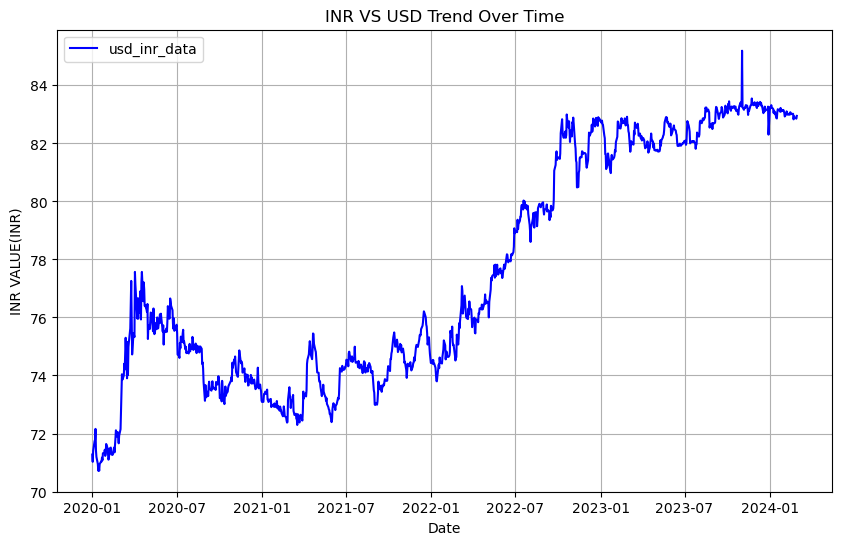

In [44]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(usd_inr_data['Adj Close'], label='usd_inr_data', color='blue')
plt.title('INR VS USD Trend Over Time')
plt.xlabel('Date')
plt.ylabel('INR VALUE(INR)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Rename the 'Adj Close' column in usd_inr_data to avoid column name conflicts after merging
usd_inr_data.rename(columns={'Adj Close': 'usd_inr_Adj_Close'}, inplace=True)

# Merge gold data into the existing DataFrame based on the date index
merged_data = merged_data.merge(usd_inr_data[['usd_inr_Adj_Close']], how='left', left_index=True, right_index=True)

# Display the merged DataFrame
merged_data

,Open,High,Low,Close,Adj Close,Volume,Sentiment,Sentiment_Class,Stock_Price_Change,Price_Change_Percentage,Gold_Adj_Close,usd_inr_Adj_Close
Date,,,,,,,,,,,,
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.5319,Positive,0.549999,1.175212,1524.500000,71.025002
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.6289,Positive,0.549999,1.175212,1524.500000,71.025002
2020-01-03,47.349998,48.250000,46.849998,47.099998,47.099998,94827592,0.6841,Positive,-0.250000,-0.527983,1549.199951,71.415001
2020-01-03,47.349998,48.250000,46.849998,47.099998,47.099998,94827592,0.6739,Positive,-0.250000,-0.527983,1549.199951,71.415001
2020-01-06,46.750000,46.750000,45.000000,45.150002,45.150002,102880221,0.5319,Positive,-1.599998,-3.422457,1566.199951,71.731003
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-13,21.549999,21.700001,20.900000,21.200001,21.200001,342846077,0.5319,Positive,-0.349998,-1.624123,1982.300049,83.396004
2023-12-14,21.500000,22.100000,21.299999,21.400000,21.400000,339666217,0.1860,Positive,-0.100000,-0.465118,2030.199951,83.285301
2024-01-25,24.799999,25.299999,24.700001,24.850000,24.850000,213588805,0.4019,Positive,0.050001,0.201618,2016.900024,83.097603


In [46]:
merged_data.isnull().sum()

Open                       0
High                       0
Low                        0
Close                      0
Adj Close                  0
Volume                     0
Sentiment                  0
Sentiment_Class            0
Stock_Price_Change         0
Price_Change_Percentage    0
Gold_Adj_Close             0
usd_inr_Adj_Close          0
dtype: int64

In [47]:
# Drop null values
merged_data.dropna(inplace=True)

In [48]:
import statsmodels.api as sm


# Fit a linear regression model
X = merged_data[['usd_inr_Adj_Close']]
y = merged_data['Stock_Price_Change']
X = sm.add_constant(X)  # Add a constant term to the independent variable
model = sm.OLS(y, X).fit()

# Perform hypothesis testing on the coefficient of usd_inr value
p_value = model.pvalues['usd_inr_Adj_Close']

# Set significance level (alpha)
alpha = 0.05

# Print the results
print("Regression Coefficients:")
print(model.params)
print("\nP-value for usd_inr_value Coefficient:", p_value)

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant relationship between INR VS USD value and stock price changes.")
else:
    print("Do not reject the null hypothesis.")
    print("There is not enough evidence to conclude a statistically significant relationship.")

Regression Coefficients:
const               -5.624265
usd_inr_Adj_Close    0.067806
dtype: float64

P-value for usd_inr_value Coefficient: 0.21501840341345665
Do not reject the null hypothesis.
There is not enough evidence to conclude a statistically significant relationship.


### CORRELATION WITH FUEL PRICES

In [49]:
Fuelprice_ticker = 'CL=F'

# Fetch historical data
fuel_price_data = yf.download(Fuelprice_ticker, start="2020-01-01", end=current_date)

[*********************100%%**********************]  1 of 1 completed


In [50]:
fuel_price_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,61.599998,61.599998,60.639999,61.180000,61.180000,486873
2020-01-03,61.180000,64.089996,61.130001,63.049999,63.049999,885861
2020-01-06,63.709999,64.720001,62.639999,63.270000,63.270000,724236
2020-01-07,62.910000,63.150002,62.110001,62.700001,62.700001,582649
2020-01-08,62.840000,65.650002,59.150002,59.610001,59.610001,1205710
...,...,...,...,...,...,...
2024-02-22,78.089996,78.919998,77.230003,78.610001,78.610001,330511
2024-02-23,78.370003,78.389999,76.349998,76.489998,76.489998,353437
2024-02-26,76.400002,78.029999,75.839996,77.580002,77.580002,274710


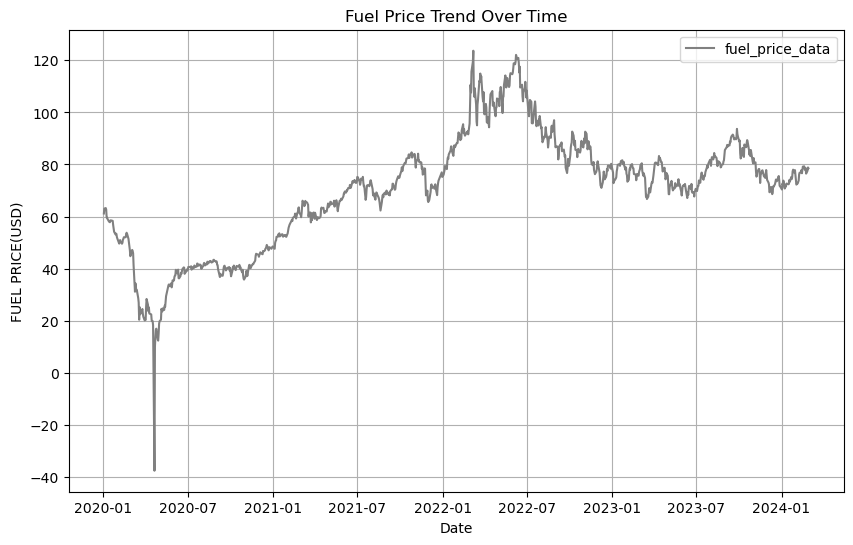

In [51]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fuel_price_data['Adj Close'], label='fuel_price_data', color='grey')
plt.title('Fuel Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('FUEL PRICE(USD)')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Rename the 'Adj Close' column in fuel_price_data to avoid column name conflicts after merging
fuel_price_data.rename(columns={'Adj Close': 'fuel_price_Adj_Close'}, inplace=True)

# Merge gold data into the existing DataFrame based on the date index
merged_data = merged_data.merge(fuel_price_data[['fuel_price_Adj_Close']], how='left', left_index=True, right_index=True)

# Display the merged DataFrame
merged_data

,Open,High,Low,Close,Adj Close,Volume,Sentiment,Sentiment_Class,Stock_Price_Change,Price_Change_Percentage,Gold_Adj_Close,usd_inr_Adj_Close,fuel_price_Adj_Close
Date,,,,,,,,,,,,,
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.5319,Positive,0.549999,1.175212,1524.500000,71.025002,61.180000
2020-01-02,46.799999,48.500000,46.400002,47.349998,47.349998,122242838,0.6289,Positive,0.549999,1.175212,1524.500000,71.025002,61.180000
2020-01-03,47.349998,48.250000,46.849998,47.099998,47.099998,94827592,0.6841,Positive,-0.250000,-0.527983,1549.199951,71.415001,63.049999
2020-01-03,47.349998,48.250000,46.849998,47.099998,47.099998,94827592,0.6739,Positive,-0.250000,-0.527983,1549.199951,71.415001,63.049999
2020-01-06,46.750000,46.750000,45.000000,45.150002,45.150002,102880221,0.5319,Positive,-1.599998,-3.422457,1566.199951,71.731003,63.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-13,21.549999,21.700001,20.900000,21.200001,21.200001,342846077,0.5319,Positive,-0.349998,-1.624123,1982.300049,83.396004,69.470001
2023-12-14,21.500000,22.100000,21.299999,21.400000,21.400000,339666217,0.1860,Positive,-0.100000,-0.465118,2030.199951,83.285301,71.580002
2024-01-25,24.799999,25.299999,24.700001,24.850000,24.850000,213588805,0.4019,Positive,0.050001,0.201618,2016.900024,83.097603,77.360001


In [53]:
merged_data.isnull().sum()

Open                       0
High                       0
Low                        0
Close                      0
Adj Close                  0
Volume                     0
Sentiment                  0
Sentiment_Class            0
Stock_Price_Change         0
Price_Change_Percentage    0
Gold_Adj_Close             0
usd_inr_Adj_Close          0
fuel_price_Adj_Close       0
dtype: int64

In [54]:
# Drop null values
merged_data.dropna(inplace=True)

In [55]:
# Fit a linear regression model
X = merged_data[['fuel_price_Adj_Close']]
y = merged_data['Stock_Price_Change']
X = sm.add_constant(X)  # Add a constant term to the independent variable
model = sm.OLS(y, X).fit()

# Perform hypothesis testing on the coefficient of Fuel price
p_value = model.pvalues['fuel_price_Adj_Close']

# Set significance level (alpha)
alpha = 0.05

# Print the results
print("Regression Coefficients:")
print(model.params)
print("\nP-value for Fuel_Price Coefficient:", p_value)

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant relationship between Fuel price and stock price changes.")
else:
    print("Do not reject the null hypothesis.")
    print("There is not enough evidence to conclude a statistically significant relationship.")

Regression Coefficients:
const                  -0.850757
fuel_price_Adj_Close    0.006321
dtype: float64

P-value for Fuel_Price Coefficient: 0.3676030864325913
Do not reject the null hypothesis.
There is not enough evidence to conclude a statistically significant relationship.


In [56]:
merged_data.head()

,Open,High,Low,Close,Adj Close,Volume,Sentiment,Sentiment_Class,Stock_Price_Change,Price_Change_Percentage,Gold_Adj_Close,usd_inr_Adj_Close,fuel_price_Adj_Close
Date,,,,,,,,,,,,,
2020-01-02,46.799999,48.50,46.400002,47.349998,47.349998,122242838,0.5319,Positive,0.549999,1.175212,1524.500000,71.025002,61.180000
2020-01-02,46.799999,48.50,46.400002,47.349998,47.349998,122242838,0.6289,Positive,0.549999,1.175212,1524.500000,71.025002,61.180000
2020-01-03,47.349998,48.25,46.849998,47.099998,47.099998,94827592,0.6841,Positive,-0.250000,-0.527983,1549.199951,71.415001,63.049999
2020-01-03,47.349998,48.25,46.849998,47.099998,47.099998,94827592,0.6739,Positive,-0.250000,-0.527983,1549.199951,71.415001,63.049999
2020-01-06,46.750000,46.75,45.000000,45.150002,45.150002,102880221,0.5319,Positive,-1.599998,-3.422457,1566.199951,71.731003,63.270000
